# AOSC650 Term Project
###### In this project, I will be attempting to classify different types of lunar mineralogies based on hyperspectral data from the Moon Mineralogy Mapper (M3). This will be done using a simple Multilayer Perceptron Model.

#### Importing Packages

In [2]:
#Local Imports
from classifyhyspecmoon.neuralnetdata import NeuralNetData
from classifyhyspecmoon.buildNN import run_mlp,MyHyperParameters

#Remote Imports
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.font_manager as fnt_mang
import numpy as np
from matplotlib.colors import ListedColormap

Thank you for using ClassifyHySpecMoon by z-vig!



#### Data Acquisition

Loaded in data of shape: (239, 584, 408)
Reminder: (bands,ydimension,xdimension)


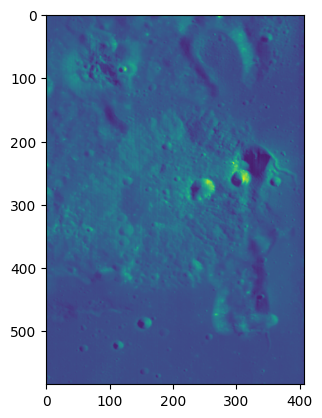

In [3]:
#Getting Raw Spectral Data and placing it in mydata ojbect.
mydata = NeuralNetData('C:/Users/zvig/.julia/dev/JENVI.jl/Data/targeted.hdf5')
print(f'Loaded in data of shape: {mydata.smoothspec.shape}')
print(f'Reminder: (bands,ydimension,xdimension)')
plt.imshow(mydata.smoothspec[1,:,:])

#### Label Creation for Supervised Learning

In [4]:
#Creating data labels based on the Spectral ANgle Mapper (SAM) technique.

# Defining reference spectra for labeling.
olpt = (200,284)
refspec1 = mydata.smoothspec[:,*olpt] #olivine
olcheck = mydata.contrem[:,*olpt]
refspec2 = mydata.smoothspec[:,500,200] #mare (South)
refspec3 = mydata.smoothspec[:,190,360] #mare (North)
refspec4 = mydata.smoothspec[:,300,200] #dome center
refspec5 = mydata.smoothspec[:,320,100] #dome flank
refspec_raw = mydata.rawspec[:,200,280]
refspec_dict = {'Olivine':(refspec1,1.2),'Mare1':(refspec2,1),'Mare2':(refspec3,0.7),'Dome1':(refspec4,1),'Dome2':(refspec5,1)} #Dictionary of tuples {str:(array,threshold)}

#Labeling data by modifying mydata object
mydata.label_data('Spectral_Angle',refspec_dict)

c:\Users\zvig\Desktop\python_code\ClassifyHySpecMoon\classifyhyspecmoon\create_labels.py:23: RuntimeWarning: invalid value encountered in arccos
  spa = 180*np.arccos(np.einsum('ijk,ijk->ij',M,I)/(np.linalg.norm(M,axis=2)*np.linalg.norm(I,axis=2)))/np.pi


#### Visualizing Labeled Data

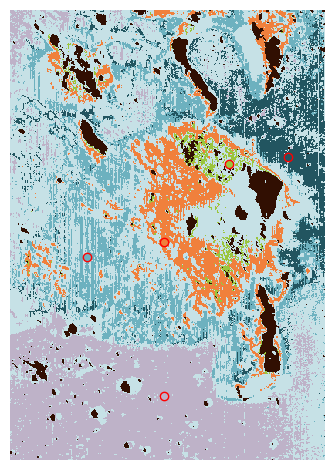

In [5]:
#
# fig,[ax11,ax12] = plt.subplots(2,1,height_ratios=[4,1],figsize=(4,8))
c = ['#310f02','#9BC53D','#BEB2C8','#225560','#F0803C','#6DB1BF','#C6E1E6']
c_map = ListedColormap(['#310f02','#9BC53D','#BEB2C8','#225560','#F0803C','#6DB1BF','#C6E1E6'])
# ax11.imshow(mydata.labeled_data,interpolation='none',cmap=c)
# ax11.set_title('SPA Map')
# ax12.plot(refspec1)
# ax12.plot(refspec_raw)
# ax12.plot(mydata.wvl,olcheck)

# for i in range(0,len(ref_pts)):
#     ax11.scatter(*ref_pts[i],color = c(i+1),edgecolors='red')
# ax12.set_title('Reference Spectrum')
# ax12.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# plt.savefig('G:/Shared drives/Zach Lunar-VISE/Abstracts/NESF_2024/Figures/similarity_map',dpi=300)

ref_pts = [(olpt[1],olpt[0]),(200,500),(360,190),(200,300),(100,320)]
fig2,ax2 = plt.subplots(1,layout='tight')
ax2.imshow(mydata.labeled_data,interpolation='none',cmap=c_map)
ax2.axis('off')
for i in range(0,len(ref_pts)):
    ax2.scatter(*ref_pts[i],color = c[i+1],edgecolors='red')

plt.savefig('G:/My Drive/Machine Learning Project/Figures/classified_image.png',dpi=800)
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)



12148
3056
48254
17124
19304
30725
107661


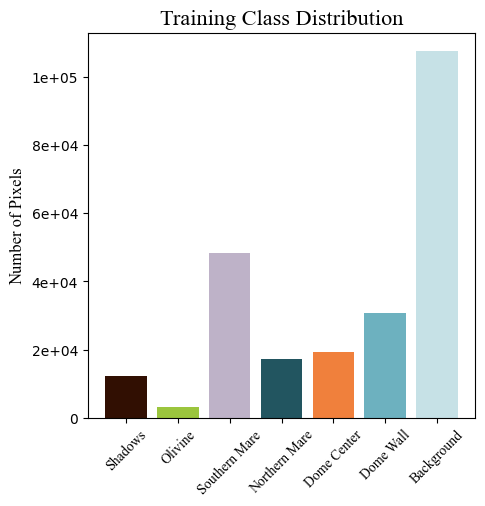

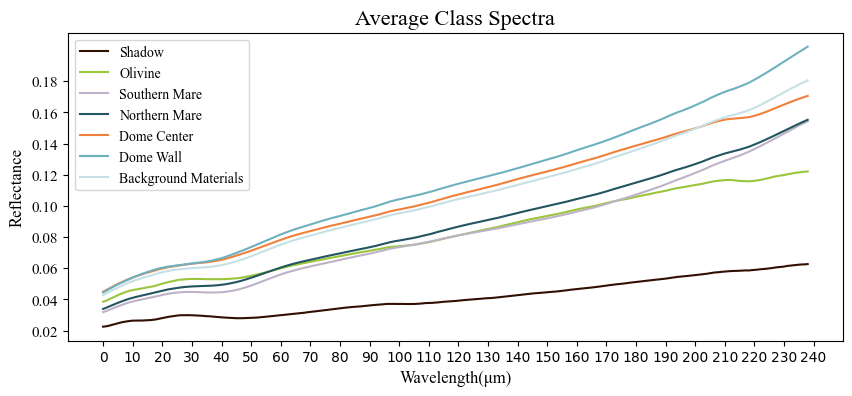

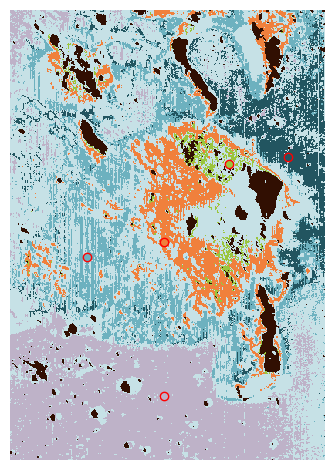

In [16]:
#Visualing labels
c = ['#310f02','#9BC53D','#BEB2C8','#225560','#F0803C','#6DB1BF','#C6E1E6']
c_labels = ['Shadows','Olivine','Southern Mare','Northern Mare','Dome Center','Dome Wall','Background']

shadows = mydata.smoothspec[:,mydata.labeled_data==0]
olivine = mydata.smoothspec[:,mydata.labeled_data==1]
mareS = mydata.smoothspec[:,mydata.labeled_data==2]
mareN = mydata.smoothspec[:,mydata.labeled_data==3]
domeC = mydata.smoothspec[:,mydata.labeled_data==4]
domeF = mydata.smoothspec[:,mydata.labeled_data==5]
bgrnd = mydata.smoothspec[:,mydata.labeled_data==6]

nshad = shadows.shape[1]
nol = olivine.shape[1]
nmarS = mareS.shape[1]
nmarN = mareN.shape[1]
ndomeC = domeC.shape[1]
ndomeF = domeF.shape[1]
nbgrnd = bgrnd.shape[1]

fancyfont = {'fontname':'Times New Roman'}
font = fnt_mang.FontProperties(family='Times New Roman',style='normal',size=10)

fig1,ax1 = plt.subplots(1,1,figsize=(5,5))
ax1.bar([1,2,3,4,5,6,7],[nshad,nol,nmarS,nmarN,ndomeC,ndomeF,nbgrnd],color=c)
ax1.set_xticks([1,2,3,4,5,6,7],c_labels,rotation=45,**fancyfont,fontsize=10)
ax1.set_title('Training Class Distribution',**fancyfont,fontsize=16)
ax1.set_ylabel('Number of Pixels',**fancyfont,fontsize=12)
# ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2g}'))
plt.savefig('G:/My Drive/Machine Learning Project/Figures/Class_Imbalance.svg',bbox_inches="tight")

fig2,ax21 = plt.subplots(1,1,figsize=(10,4))
ax21.plot(np.mean(shadows,axis=1),label='Shadow',color=c[0])
ax21.plot(np.mean(olivine,axis=1),label='Olivine',color=c[1])
ax21.plot(np.mean(mareS,axis=1),label='Southern Mare',color=c[2])
ax21.plot(np.mean(mareN,axis=1),label='Northern Mare',color=c[3])
ax21.plot(np.mean(domeC,axis=1),label='Dome Center',color=c[4])
ax21.plot(np.mean(domeF,axis=1),label='Dome Wall',color=c[5])
ax21.plot(np.mean(bgrnd,axis=1),label='Background Materials',color=c[6])
ax21.legend(prop=font)

ax21.set_xlabel('Wavelength(\u03bcm)',**fancyfont,fontsize=12)
ax21.set_ylabel('Reflectance',**fancyfont,fontsize=12)
ax21.set_title('Average Class Spectra',**fancyfont,fontsize=16)
ax21.set_xticks(np.arange(0,241,10),np.arange(0,241,10))
# ax21.set_xticks(np.arange(500,3500,500),labels=np.arange(500,3500,500),**fancyfont,fontsize=11)
ax21.set_yticks(np.arange(0.02,0.2,0.02),labels=np.arange(0.02,0.2,0.02),**fancyfont,fontsize=11)
ax21.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
# plt.savefig('G:/My Drive/Machine Learning Project/Figures/class_distribution.svg',transparent=True,bbox_inches='tight',pad_inches=2)
# plt.savefig('G:/My Drive/Machine Learning Project/Figures/class_averages.svg',transparent=True,bbox_inches='tight',pad_inches=1)

ref_pts = [(olpt[1],olpt[0]),(200,500),(360,190),(200,300),(100,320)]
fig2,ax2 = plt.subplots(1,layout='tight')
ax2.imshow(mydata.labeled_data,interpolation='none',cmap=c_map)
ax2.axis('off')
for i in range(0,len(ref_pts)):
    ax2.scatter(*ref_pts[i],color = c[i+1],edgecolors='red')

print(np.count_nonzero(mydata.labeled_data == 0))
print(np.count_nonzero(mydata.labeled_data == 1))
print(np.count_nonzero(mydata.labeled_data == 2))
print(np.count_nonzero(mydata.labeled_data == 3))
print(np.count_nonzero(mydata.labeled_data == 4))
print(np.count_nonzero(mydata.labeled_data == 5))
print(np.count_nonzero(mydata.labeled_data == 6))

#### Building and running the Model

In [6]:
hyperparams = MyHyperParameters(
    nlyrs = 10,
    npl = [100]*10,
    apl = ['relu']*10,
    lrate = 0.01,
    batch_size = 1000,
    nepochs = 20
    )

mydata.split_train_test()
mydata.minmax_normalization((0,1))

In [7]:
print(mydata.X_train.shape)

(178704, 239)


In [8]:
model,hist,pred_raw = run_mlp(mydata,hyperparams)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               24000     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               

InvalidArgumentError: Graph execution error:

Detected at node GatherV2 defined at (most recent call last):
<stack traces unavailable>
indices[0] = 6 is not in [0, 1)
	 [[{{node GatherV2}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1612]

#### Model Assessment

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               24000     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               1

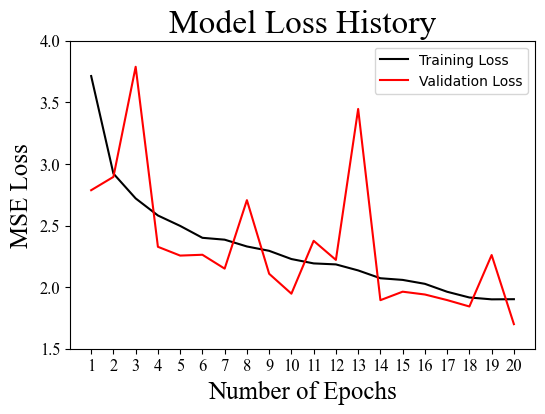

In [8]:
#Loss-validation curve
model.summary()

# print(mydata.Y_train)
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(range(0,hyperparams.nepochs),hist.history['loss'],c='k',label='Training Loss')
ax.plot(range(0,hyperparams.nepochs),hist.history['val_loss'],c='r',label='Validation Loss')
ax.legend()

ax.set_title('Model Loss History',**fancyfont,fontsize=24)
ax.set_xlabel('Number of Epochs',**fancyfont,fontsize=18)
ax.set_ylabel('MSE Loss',**fancyfont,fontsize=18)
ax.set_xticks(np.arange(0,20),labels=np.arange(1,21),**fancyfont,fontsize=12)
ax.set_yticks(np.arange(1.5,4.5,0.5),labels=np.arange(1.5,4.5,0.5),**fancyfont,fontsize=12)
# plt.ylim(0,0.5)

plt.savefig('G:/My Drive/Machine Learning Project/Figures/Loss_History.png',dpi=300)

6.0957584
Training Data: 178704 (75%)
Testing Data: 59568 (25%)
Labeled Training Data: 59568
Predicted Test Data: 59568
dict_values([3010, 742, 12198, 4190, 4779, 7638, 27011])
dict_values([2682, 224, 162, 14089, 9066, 32918, 427])
27011
427
59568
59568


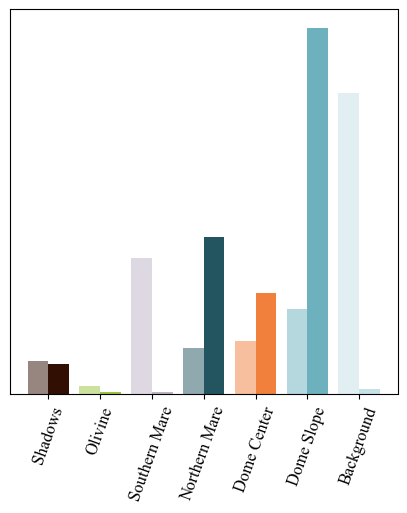

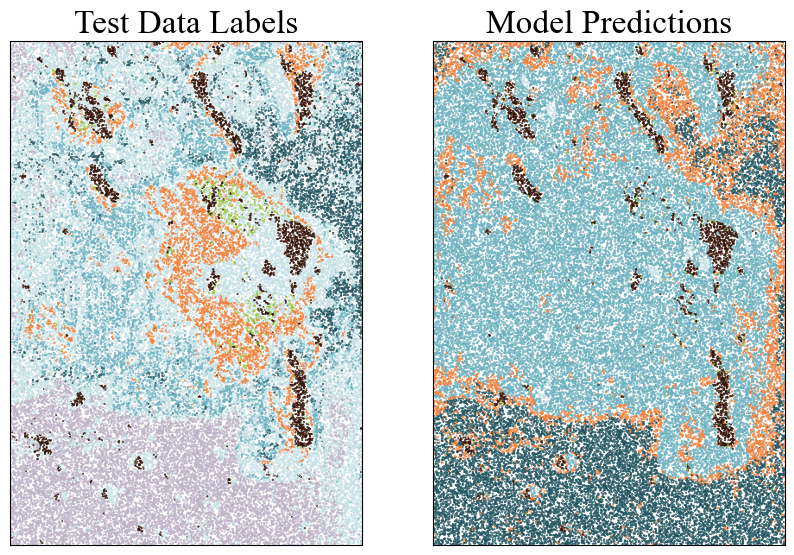

In [29]:
pred = np.around(pred_raw,0)
print(pred_raw.max())

class_names = ['Shadows','Olivine','Southern Mare','Northern Mare','Dome Center', 'Dome Slope','Background']
label_dist = {}
pred_dist = {}
for i in range(0,len(class_names)):
    label_dist[class_names[i]] = mydata.Y_test[mydata.Y_test==i].shape[0]
    pred_dist[class_names[i]] = pred[pred==i].shape[0]

print(f'Training Data: {len(mydata.Y_train)} ({len(mydata.Y_train)/mydata.num_pixels:.0%})')
print(f'Testing Data: {len(mydata.Y_test)} ({len(mydata.Y_test)/mydata.num_pixels:.0%})')
tot_label = np.array(list(label_dist.values())).sum()
tot_pred = np.array(list(pred_dist.values())).sum()
print(f'Labeled Training Data: {tot_label}')
print(f'Predicted Test Data: {tot_pred}')

print(label_dist.values())
print(pred_dist.values())

#Class Distributions
fig1,ax = plt.subplots(1,1,figsize=(5,5))
width=0.4
ax.bar(np.arange(0,len(class_names))-width/2,list(label_dist.values()),width=width,color=c,alpha=0.5)
ax.bar(np.arange(0,len(class_names))+width/2,list(pred_dist.values()),width=width,color=c)
ax.set_xticks(np.arange(0,len(class_names)))
ax.set_xticklabels(class_names,**fancyfont,fontsize=12,rotation=70)
ax.set_yticks([])

#Spatial Relations
c = ['#310f02','#9BC53D','#BEB2C8','#225560','#F0803C','#6DB1BF','#C6E1E6']
c_map = ListedColormap(['#310f02','#9BC53D','#BEB2C8','#225560','#F0803C','#6DB1BF','#C6E1E6'])

fig2,[ax1,ax2] = plt.subplots(1,2,figsize=(10,12))
ax1.imshow(mydata.labeled_data,interpolation='none',cmap=c_map,alpha=0)
ax1.scatter(mydata.xcoord_test,mydata.ycoord_test,marker='.',s=0.8,c=mydata.Y_test,cmap=c_map)

ax2.imshow(mydata.labeled_data,interpolation='none',cmap=c_map,alpha=0)
ax2.scatter(mydata.xcoord_test,mydata.ycoord_test,marker='.',s=0.8,c=pred,cmap=c_map)

ax1.set_title('Test Data Labels',fontdict={'size':24,'family':'Times New Roman'})
ax2.set_title('Model Predictions',fontdict={'size':24,'family':'Times New Roman'})

ax1.set_xticks([]),ax1.set_yticks([])
ax2.set_xticks([]),ax2.set_yticks([])

print(np.count_nonzero(mydata.Y_test==6))
print(np.count_nonzero(pred==6))

print(np.array(list(label_dist.values())).sum())
print(np.array(list(pred_dist.values())).sum())

# plt.savefig('G:/My Drive/Machine Learning Project/Figures/Model Performance.png',dpi=800)

([<matplotlib.axis.YTick at 0x25a3700dad0>,
 [Text(0, 0, 'Shadows'),
  Text(0, 1, 'Olivine'),
  Text(0, 2, 'Southern Mare'),
  Text(0, 3, 'Northern Mare'),
  Text(0, 4, 'Dome Center'),
  Text(0, 5, 'Dome Slope'),
  Text(0, 6, 'Background')])

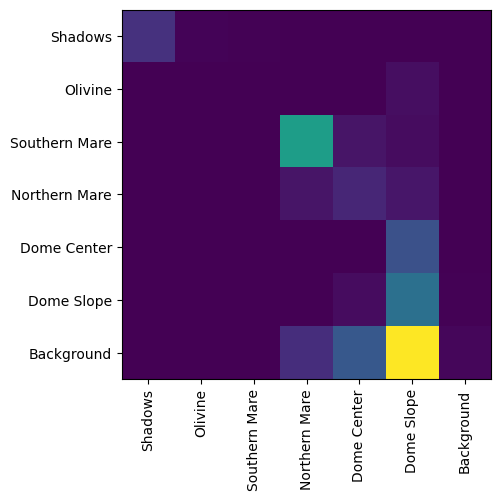

In [32]:
import sklearn.metrics

conf = sklearn.metrics.confusion_matrix(mydata.Y_test,pred)
plt.imshow(conf)
plt.xticks(np.arange(7),class_names,rotation=90)
plt.yticks(np.arange(7),class_names)